## odszumianie od Klaudi na tydzień do odszumiania

In [3]:
using FFTW
using Plots
using WAV

In [2]:
dt = 0.001
start = 0
stop = 3
t = LinRange(start, stop, Int((stop - start)/dt))
f = sin.(2π * 50t) + sin.(2π * 120t)
f_clean = f
f_noisy = f + 2.5 * randn(length(t))

3000-element Array{Float64,1}:
 -0.36112855566175517
  4.800917969905114
 -0.9295523248648503
  3.4781207840812627
  1.7485488618892389
 -0.32799855017419766
 -3.2211953556123074
  1.9653570816146795
  1.6844432027857905
 -0.6908689238106376
  3.6184691221638188
  7.826168104774538
 -1.7851751351820244
  ⋮
 -1.9175622698677108
 -2.057047283813337
 -5.397082505075204
  0.9774685879280902
 -0.25818540047695654
  0.7920886434605672
 -0.8473922439525418
  0.3608383524627963
 -3.4229164185174348
 -0.648508023945521
 -1.799715445212164
  3.9736581436424596

In [3]:
wavwrite(f_clean,"clean.wav")
wavwrite(f_noisy, "noisy.wav")

In [89]:
wavplay("clean.wav")
wavplay("noisy.wav")

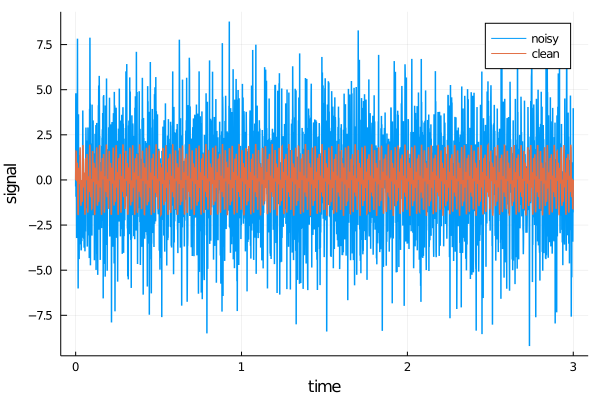

In [5]:
plot(t, f_noisy, linewidth = 1.5, label = "noisy", xlabel = "time", ylabel = "signal")
plot!(t, f_clean, linewidth = 1.5, label = "clean")

In [6]:
n = length(t)
fhat = fft(f_noisy)
PSD = real(fhat .* conj(fhat)/n) #power spectral density
freq = 1/(dt * n) * [i for i in 1:n]
L = [i for i in 1:Int(n/2)] #bierzemy połowę

1500-element Array{Int64,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 1489
 1490
 1491
 1492
 1493
 1494
 1495
 1496
 1497
 1498
 1499
 1500

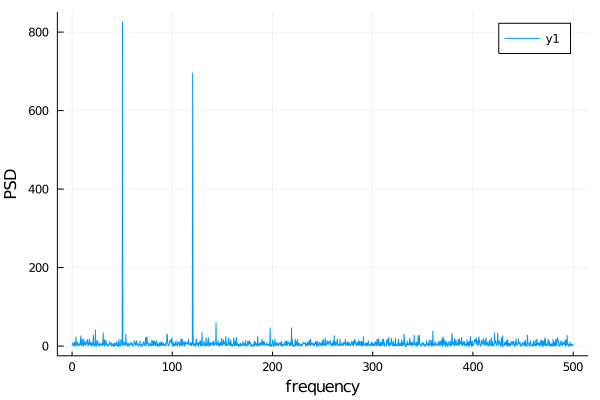

In [7]:
plot(freq[L], PSD[L], xlabel = "frequency", ylabel = "PSD")

In [8]:
indices = [i > 100 for i in PSD]
PSD_clean = indices .* PSD
fhat_clean = indices .* fhat
filtered = ifft(fhat_clean)
filtered_fft = fft(filtered)

3000-element Array{Complex{Float64},1}:
   4.973799150320701e-14 + 0.0im
  -1.264989002217248e-15 - 2.802467485745038e-16im
 -1.0047137405632881e-15 + 1.7375875190022806e-16im
  2.1058515292685364e-15 - 3.157463888918675e-16im
  -1.547103718024145e-15 + 1.5738985179945985e-15im
   5.343213427944461e-15 + 4.2744298329500956e-15im
   3.744521602315272e-15 + 2.5724980989264707e-14im
  -9.799628328824764e-16 - 1.7832476194441218e-16im
  1.9886320323780694e-16 + 1.1191177360119866e-15im
  -7.378079689348266e-16 - 1.1942750803596271e-15im
 -2.3095573741978074e-15 + 6.719338001463613e-17im
  -9.234275045027397e-16 + 8.411115201927166e-16im
  -7.608893342793952e-16 - 7.112220595267227e-17im
                         ⋮
  -7.608893342793951e-16 + 7.112220595267227e-17im
  -9.234275045027391e-16 - 8.411115201927169e-16im
    1.10483526455157e-14 - 4.77873125266848e-16im
  -7.378079689348248e-16 + 1.1942750803596267e-15im
   1.988632032378096e-16 - 1.1191177360119836e-15im
   -9.79962832882477e-16 

In [9]:
wavwrite(real.(filtered),"cleaned.wav")

In [88]:
wavplay("cleaned.wav")

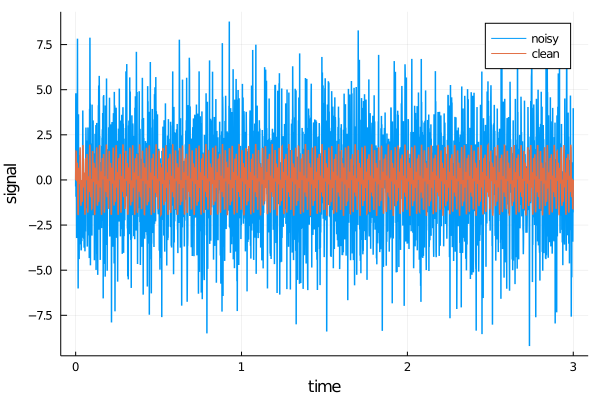

In [11]:
plot(t, f_noisy, linewidth = 1.5, label = "noisy", xlabel = "time", ylabel = "signal")
plot!(t, f_clean, linewidth = 1.5, label = "clean")

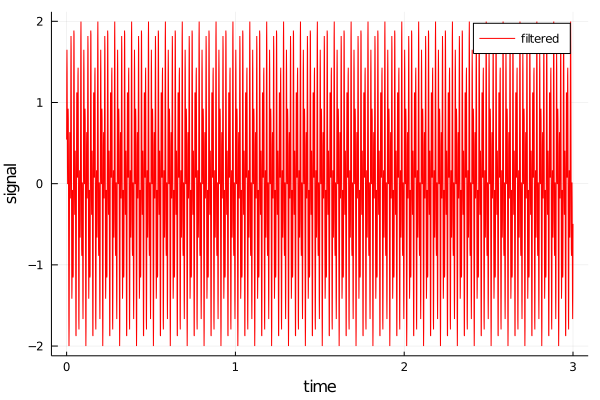

In [12]:
plot(t, real(filtered), color = :red, label = "filtered", xlabel = "time", ylabel = "signal")

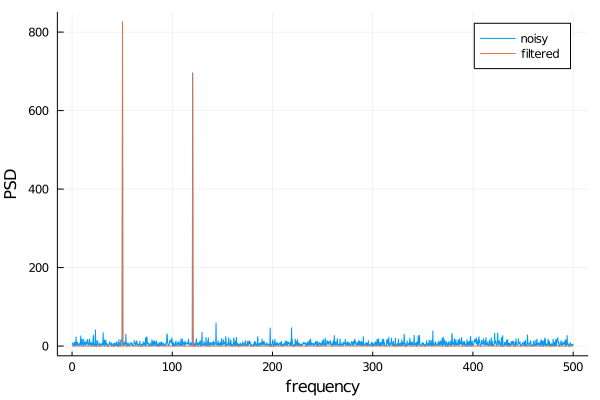

In [13]:
plot(freq[L], PSD[L], label = "noisy", xlabel = "frequency", ylabel = "PSD")
plot!(freq[L], PSD_clean[L], label = "filtered")

## Sth try

In [110]:
wavplay("brzęczka.wav")

In [103]:
brzeczka, fs_b = wavread("brzęczka.wav")[1][:, 1], wavread("brzęczka.wav")[2];
N=length(brzeczka);
#L=[i for i in 1:floor(N/2)];

In [9]:
tstep=1/fs_b
N=length(brzeczka)
time=(N-1)/fs_b
T=0:tstep:time;

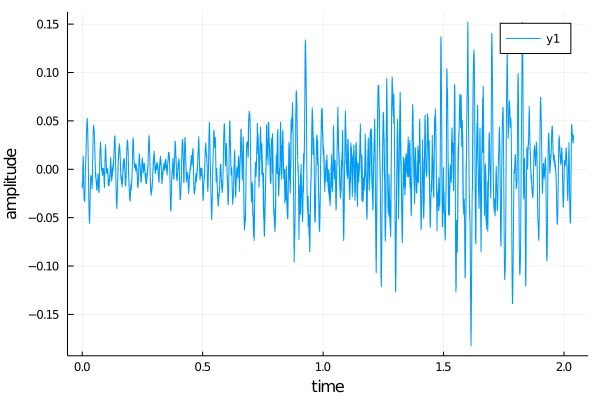

In [122]:
plot(T,brzeczka,xlabel="time",ylabel="amplitude")

In [26]:
fft_b=fft(brzeczka)
b_mag=abs.(fft_b)/N
fstep=fs_b/N
freq=LinRange(0,(N-1)*fstep,N)

freq_plot=freq[1:Int((N-1)/2+1)]
b_mag_plot=b_mag[1:Int((N-1)/2+1)];

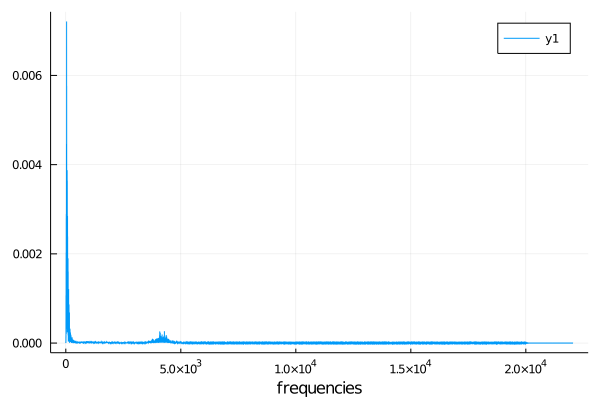

In [99]:
plot(freq_plot, b_mag_plot, xlabel="frequencies")#,xlims=(0,2e3),ylims=(0,0.0005))

In [128]:
plot(freq_plot, 20*log10.(b_mag_plot),xlims=(0,5e3), xlabel="frequencies", ylabel="db");

In [43]:
function remove_frequency(sound, fs, N, freq_start, freq_stop)
    tstep = 1/fs
    t = LinRange(0, (N-1)*tstep, N)
    fstep = fs/N
    f = LinRange(0, (N-1)*fstep, N)
    
    fhat = fft(sound)
    fhat[floor(Int, freq_start * N/f[end]):ceil(Int, freq_stop * N/f[end])] .= 0
    fhat[floor(Int, (f[end] - freq_stop) * N/f[end]):ceil(Int, (f[end] - freq_start) * N/f[end])] .= 0

    fhat_mag = abs.(fhat)/N
    return fhat, fhat_mag, f
end

remove_frequency (generic function with 1 method)

In [56]:
brzeczka_filtered, fhat_mag_filtered, b_freq =remove_frequency(brzeczka ,fs_b, N ,1 ,400);

In [57]:
b_freq_plot=b_freq[1:Int((N-1)/2+1)]
fhat_mag_filtered_plot=fhat_mag_filtered[1:Int((N-1)/2+1)];

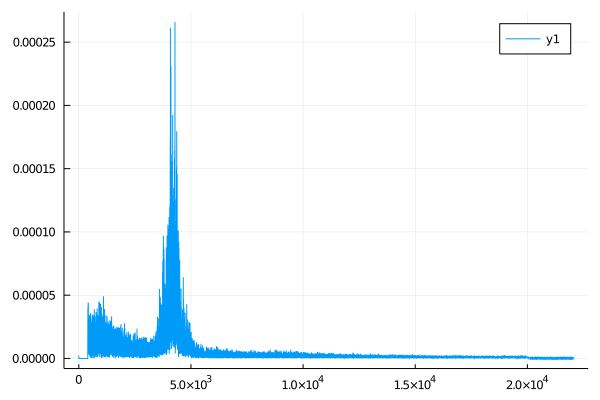

In [58]:
plot(b_freq_plot,fhat_mag_filtered_plot)

In [124]:
brzeczka_clean=ifft(brzeczka_filtered);

In [129]:
plot(time, real.(brzeczka_clean))
plot!(T,brzeczka,xlabel="time",ylabel="amplitude")

In [62]:
wavwrite(abs.(brzeczka_clean), "brzeczka_clean.wav")

In [112]:
wavplay("brzęczka.wav")
wavplay(abs.(brzeczka_clean), fs_b)

In [109]:
function denoising(sound, fs, N,cut_point) #wycina mniejsze wielkości
    tstep=1/fs
    time=LinRange(0, (N-1)/fs, N)
    freq_step = fs/N
    freq = LinRange(0, (N-1)*freq_step, N)
    
    fhat=fft(sound)
    PSD = real.(fhat .* conj(fhat)/N)
    #freq=1/(tstep*N)*[i for i in 1:N]
    
    indices=[i > cut_point for i in PSD]
    PSD_clean= indices .* PSD
    fhat_clean = indices .* fhat
    #filtred=ifft(fhat_clean)
    return time, PSD_clean, fhat_clean, freq
end

denoising (generic function with 1 method)

In [113]:
time,PSD,clear_brzeczka,freq=denoising(brzeczka_clean,fs_b,N, 0.00005);
L=[i for i in 1:Int((N-1)/2)];

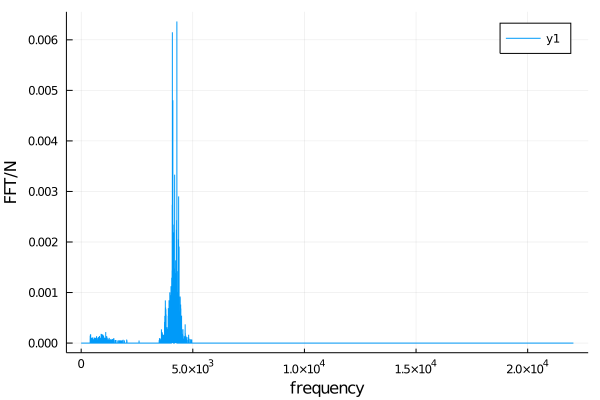

In [114]:
plot(freq[L], PSD[L], xlabel = "frequency", ylabel = "FFT/N")

In [115]:
brzeczka_c=ifft(brzeczka_clean);
wavwrite(abs.(brzeczka_c),"brzeczka_cut_filtered2.wav")

In [121]:
wavplay(abs.(brzeczka_c),fs_b)

In [118]:
wavplay("brzeczka_cut_filtered2.wav")

In [131]:
function denoising2(sound, fs, N,cut_point) #wycina mniejsze wielkości
    tstep=1/fs
    time=LinRange(0, (N-1)/fs, N)
    freq_step = fs/N
    freq = LinRange(0, (N-1)*freq_step, N)
    
    fhat=fft(sound)
    PSD = real.(fhat .* conj(fhat)/N)
    #freq=1/(tstep*N)*[i for i in 1:N]
    
    indices=[i < cut_point for i in PSD]
    PSD_clean= indices .* PSD
    fhat_clean = indices .* fhat
    #filtred=ifft(fhat_clean)
    return time, PSD_clean, fhat_clean, freq
end

denoising2 (generic function with 1 method)